In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [25]:
df = pd.read_csv('./Reddit_data/Combined_Yearly_Data/stage6_sent2019.csv')#, usecols=[2])
df

,Date,score_x,vader_neu_score_x,vader_pos_score_x,vader_neg_score_x,vader_compound_x,blob_polarity_x,blob_subjectivity_x,score_y,vader_neu_score_y,...,vader_neg_score_y,vader_compound_y,blob_polarity_y,blob_subjectivity_y,count_y,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Difference
0,1/1/2019,1.000000,0.779817,0.150914,0.063560,0.244091,0.141259,0.314487,175,136.468,...,11.123,42.7160,24.720324,55.035224,175,3715.564441,3693.330067,3741.881855,3644.876282,25.999821
1,1/2/2019,1.000000,0.788895,0.132738,0.078350,0.148628,0.072468,0.287114,286,225.624,...,22.408,42.5077,20.725735,82.114492,286,3882.304754,3715.564384,3900.709127,3711.274108,166.740313
2,1/3/2019,1.000000,0.762514,0.157115,0.070226,0.204104,0.115714,0.331457,296,225.704,...,20.787,60.4147,34.251326,98.111408,296,3795.592741,3882.303622,3916.197684,3760.944042,-86.712013
3,1/4/2019,1.000000,0.823124,0.131052,0.045803,0.198445,0.119178,0.283849,233,191.788,...,10.672,46.2377,27.768522,66.136730,233,3812.381108,3781.020706,3844.986111,3725.739663,16.788367
4,1/5/2019,1.000000,0.771269,0.155856,0.072892,0.186405,0.105184,0.317282,167,128.802,...,12.173,31.1297,17.565797,52.986176,167,3809.914343,3812.381119,3866.417432,3775.828878,-2.466765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1/2/2020,7.971751,0.772073,0.144390,0.077870,0.173630,0.079489,0.289152,1411,136.657,...,13.783,30.7325,14.069506,51.179923,177,6955.487580,7174.712357,7190.188749,6914.857474,-219.256432
366,1/3/2020,23.602151,0.777473,0.152199,0.070312,0.132112,0.088039,0.271746,4390,144.610,...,13.078,24.5729,16.375188,50.544828,186,7291.219505,6955.487580,7390.041835,6852.093401,335.731925
367,1/4/2020,20.180328,0.798306,0.137716,0.063989,0.154446,0.106286,0.303051,3693,146.090,...,11.710,28.2637,19.450301,55.458384,183,7337.636670,7291.217504,7390.762935,7263.178696,46.417165
368,1/5/2020,2.093333,0.757693,0.192093,0.050173,0.244745,0.123193,0.273214,314,113.654,...,7.526,36.7118,18.478918,40.982033,150,7347.433264,7337.421391,7487.333871,7316.763370,9.796594


In [26]:
features = ['vader_neu_score_y', 'vader_pos_score_y', 'vader_neg_score_y', 'vader_compound_y', 'blob_polarity_y', 'blob_subjectivity_y', 'Closing Price (USD)', 'count_y']
feature_df = df[features]

In [27]:
target = df[['Closing Price (USD)']]

### LSTM Forecasting

In [28]:
look_back = 4

In [29]:
# Create X and y
X = feature_df
y = target.values
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = False, random_state = 13)
# Scale
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
# Create training sequences
train_seq = TimeseriesGenerator(X_train_sc, y_train, length = look_back, batch_size = 128)
# Create test sequences
test_seq = TimeseriesGenerator(X_test_sc, y_test, length = look_back, batch_size = 128)

In [31]:
model = Sequential()

model.add(LSTM(64, input_shape=(3,8), return_sequences = True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['mape'])

In [32]:
hist = model.fit(train_seq, epochs=80, validation_data = test_seq)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 1 steps
Epoch 1/80
3/3 [==============================] - 6s 2s/step - loss: 58212188.6027 - mape: 94.1639 - val_loss: 27828582.0000 - val_mape: 66.2278
Epoch 2/80
3/3 [==============================] - 0s 42ms/step - loss: 26236110.8356 - mape: 56.4445 - val_loss: 8432548.0000 - val_mape: 32.6408
Epoch 3/80
3/3 [==============================] - 0s 33ms/step - loss: 9743700.1541 - mape: 31.6038 - val_loss: 3698491.5000 - val_mape: 20.3284
Epoch 4/80
3/3 [==============================] - 0s 33ms/step - loss: 5286516.2158 - mape: 29.2723 - val_loss: 4921968.0000 - val_mape: 23.4938
Epoch 5/80
3/3 [==============================] - 0s 35ms/step - loss: 3655737.7089 - mape: 20.8695 - val_loss: 1706032.6250 - val_mape: 13.7033
Epoch 6/80
3/3 [==============================] - 0s 38ms/step - loss: 2500920.1408 - mape: 19.7131 - val_loss: 1437887.8750 - val_mape: 12.6632
Epoch 7/80
3/3 [=======================

Epoch 57/80
3/3 [==============================] - 0s 35ms/step - loss: 713217.6655 - mape: 10.6574 - val_loss: 794231.6875 - val_mape: 9.6419
Epoch 58/80
3/3 [==============================] - 0s 38ms/step - loss: 676710.8061 - mape: 10.5058 - val_loss: 743806.5000 - val_mape: 9.4087
Epoch 59/80
3/3 [==============================] - 0s 41ms/step - loss: 621979.5999 - mape: 10.0505 - val_loss: 730444.3125 - val_mape: 9.1080
Epoch 60/80
3/3 [==============================] - 0s 38ms/step - loss: 620051.0552 - mape: 9.6922 - val_loss: 753671.5625 - val_mape: 9.3622
Epoch 61/80
3/3 [==============================] - 0s 34ms/step - loss: 643884.7933 - mape: 9.9749 - val_loss: 633945.6875 - val_mape: 8.6545
Epoch 62/80
3/3 [==============================] - 0s 34ms/step - loss: 592920.1372 - mape: 9.5789 - val_loss: 684834.3125 - val_mape: 9.1697
Epoch 63/80
3/3 [==============================] - 0s 37ms/step - loss: 570233.6160 - mape: 9.2605 - val_loss: 648328.2500 - val_mape: 8.7798
Epo

In [33]:
model.evaluate(test_seq, verbose=1)

  ...
    to  
  ['...']
1/1 [==============================] - 0s 50ms/step - loss: 689395.6875 - mape: 8.5033


[689395.6875, 8.50325]

In [34]:
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

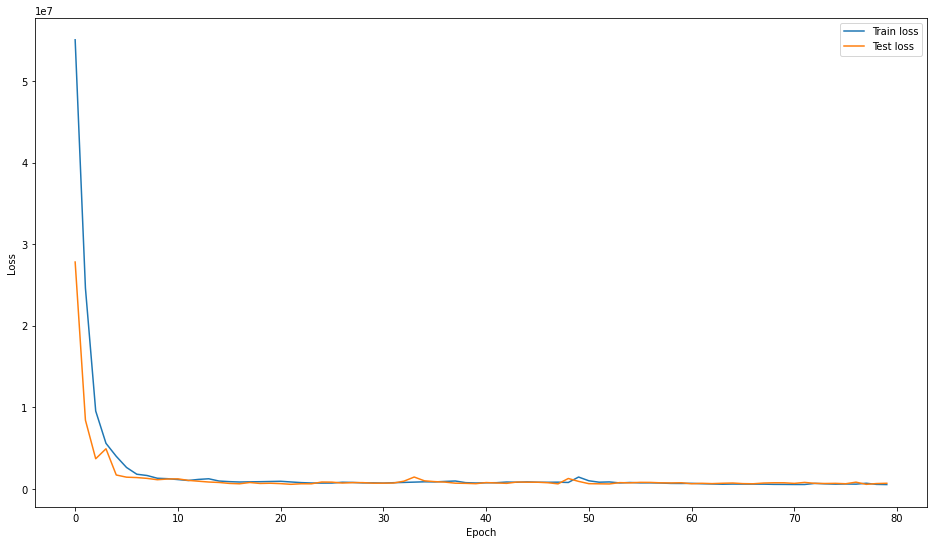

In [35]:
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

### Prediction Forecasting

In [36]:
trainPredict = model.predict(train_seq)
testPredict = model.predict(test_seq)

trainPredict0 = trainPredict[:,0]
trainPredict1 = trainPredict[:,1]
trainPredict2 = trainPredict[:,2]
trainPredict3 = trainPredict[:,3]
Trial = (trainPredict0 + trainPredict1 + trainPredict2 + trainPredict3)/4

testPredict0 = testPredict[:,0]
testPredict1 = testPredict[:,1]
testPredict2 = testPredict[:,2]
testPredict3 = testPredict[:,3]
Test = (testPredict0 + testPredict1 + testPredict2 + testPredict3)/4

#add the last 4 lookbacks from the train and test Predict
TrialX = np.append((trainPredict[0]), Trial)
TestX = np.append(testPredict[0], Test)

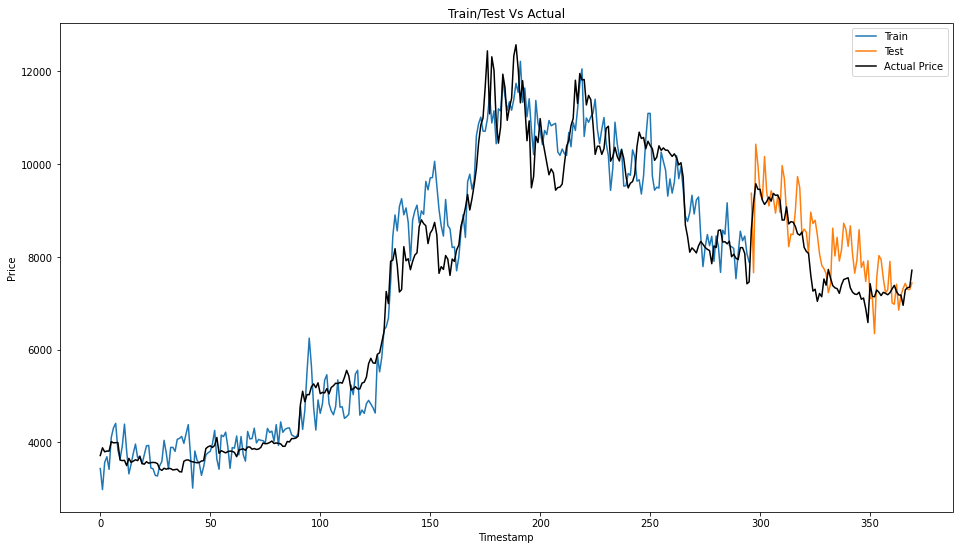

In [38]:
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(TrialX, label = 'Train')
plt.plot([None for i in TrialX] + [x for x in TestX], label = 'Test')
plt.plot(target, label = 'Actual Price', color = 'black')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Train/Test Vs Actual')
plt.legend();

In [39]:
scores = model.evaluate(train_seq, verbose=2)

  ...
    to  
  ['...']
3/3 - 0s - loss: 525238.0729 - mape: 8.6626


In [40]:
print('Model Features: BTC Prices & General Public Sentiment Scores')
model.summary()
print('Model RMSE Score: %2f' % (scores[0]**0.5))
print('Model MAE Score: %2f' % (scores[1]))
print('-' * 65)

Model Features: BTC Prices & General Public Sentiment Scores
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 64)             18688     
_________________________________________________________________
dense_1 (Dense)              (None, 3, 1)              65        
Total params: 18,753
Trainable params: 18,753
Non-trainable params: 0
_________________________________________________________________
Model RMSE Score: 724.733105
Model MAE Score: 8.662608
-----------------------------------------------------------------
